<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Bioseñales y Sistemas </center></font></h1>
<h2><font color='0B5345'> <center>
Seguimiento 2 : Tecnología y técnicas de adquisición de EMG </center></font></h2>
<h3><font color='0B5345'> <center>
Diego Andrés Flórez - Daniel Felipe Soto </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1>



<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
#Libraries
import os;
import glob;
import numpy as np;
import scipy.io as sio;
import pandas as pd;
import matplotlib.pyplot as plt;
from scipy import stats;
from numpy.lib.stride_tricks import sliding_window_view

In [64]:
!cp /content/drive/MyDrive/EMGP2/senales.zip .
!unzip senales.zip

Archive:  senales.zip
replace senales/senal1.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [111]:
import scipy.io as sio

# Cargar el archivo .mat
data = sio.loadmat('/content/senales/senal1.mat')

# Imprimir los datos cargados
print(data)

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sat Apr 13 07:52:58 2024', '__version__': '1.0', '__globals__': [], 'EMG': array([[318, 317, 254, ..., 343, 290, 297]], dtype=int32)}


In [112]:
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'EMG'])


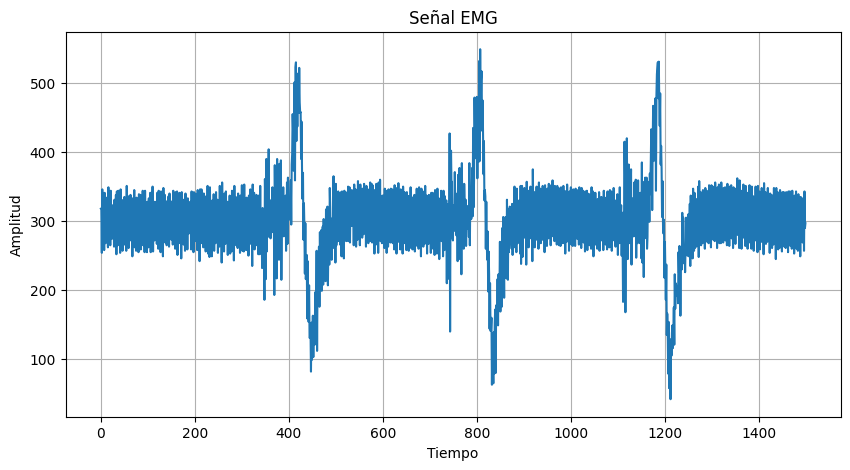

In [113]:
# Extraer la señal EMG de los datos cargados
senal_emg = data['EMG']

# Crear un vector de tiempo basado en el número de puntos de la señal
tiempo = range(len(senal_emg[0]))

# Tramar la señal EMG
plt.figure(figsize=(10, 5))
plt.plot(tiempo, senal_emg[0])  # Nota: senal_emg es una matriz 2D, así que accedemos a la primera fila (senal_emg[0])
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal EMG')
plt.grid(True)
plt.show()


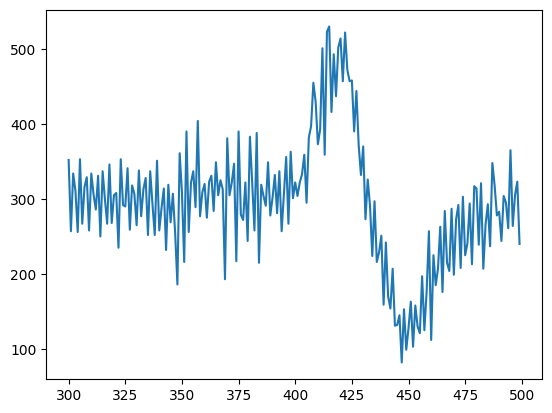

In [114]:
#Prrueba para ver si podia cortar un segmento de la señal y usarlo mas adelante
tiempof=tiempo[300:500]
senalflexion=senal_emg[0][300:500]
plt.plot(tiempof,senalflexion)

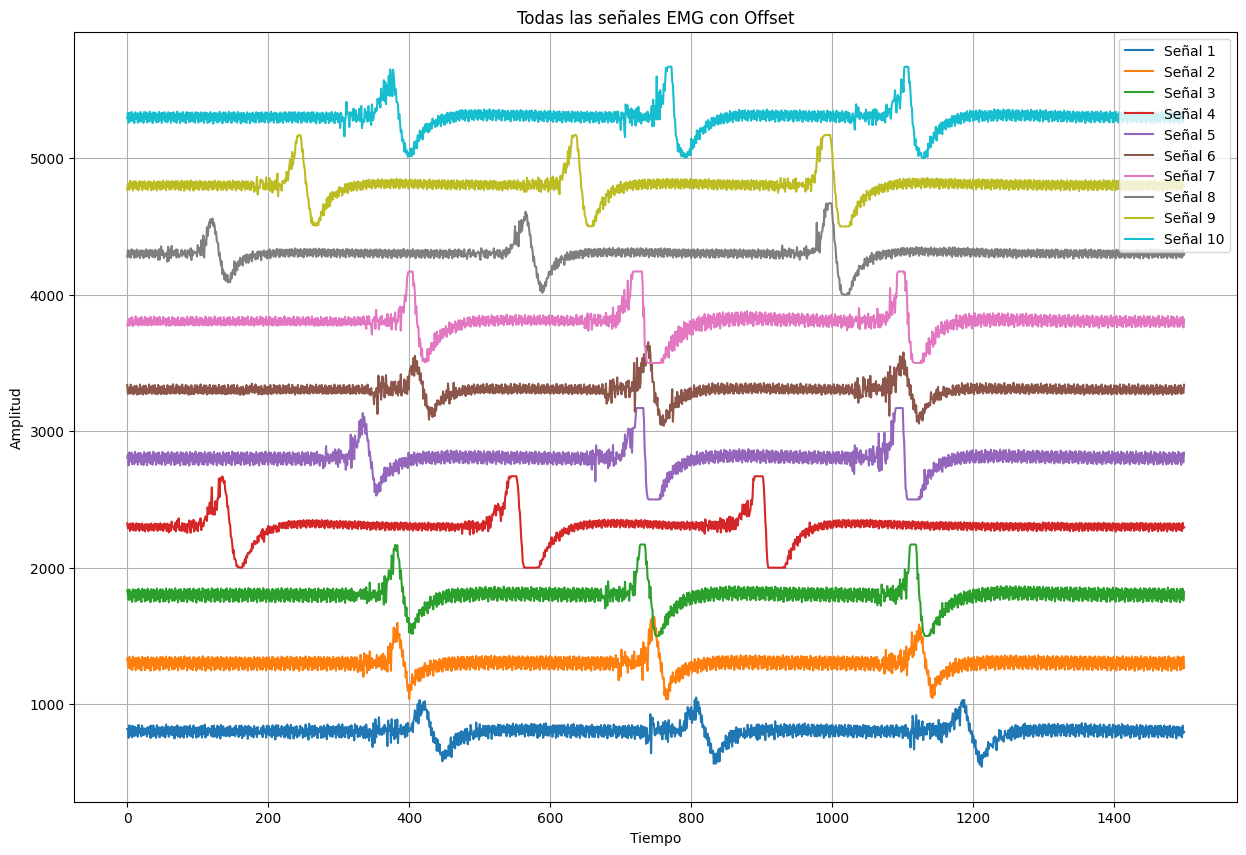

In [115]:
import scipy.io as sio
import matplotlib.pyplot as plt

# Lista para almacenar todas las señales
señales = []

# Archivos que contienen las señales
archivos = ['senal1.mat', 'senal2.mat', 'senal3.mat', 'senal4.mat', 'senal5.mat',
            'senal6.mat', 'senal7.mat', 'senal8.mat', 'senal9.mat', 'senal10.mat']

# Cargar todas las señales de los archivos .mat
for archivo in archivos:
    data = sio.loadmat('/content/senales/'+ archivo)
    señal = data['EMG'][0]
    señales.append(señal)

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Factor de offset
offset_factor = 500

# Iterar sobre todas las señales y trazarlas en un solo gráfico con offset
for i, señal in enumerate(señales, 1):
    tiempo = range(len(señal))
    offset = i * offset_factor
    plt.plot(tiempo, señal + offset, label=f'Señal {i}')

# Titulos
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Todas las señales EMG con Offset')
plt.grid(True)
plt.legend()
plt.show()


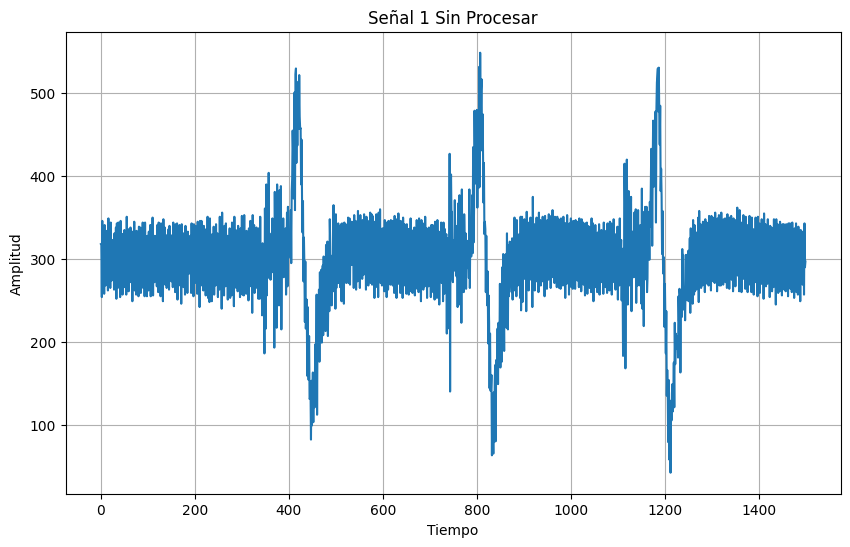

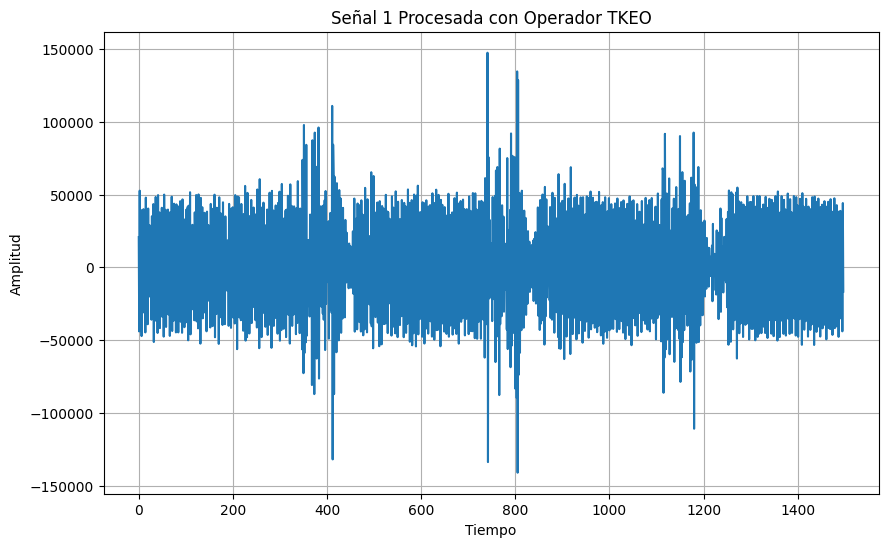

In [116]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el operador TKEO
def calcular_tkeo(señal):
    tkeo = señal[1:-1] ** 2 - señal[:-2] * señal[2:]
    return tkeo

# Cargar la señal 1 sin procesar
data = sio.loadmat('/content/senales/senal1.mat')
señal_sin_procesar = data['EMG'][0]

# Calcular y cargar la señal 1 procesada
señal_procesada = calcular_tkeo(señal_sin_procesar)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar la señal 1 sin procesar
tiempo_sin_procesar = range(len(señal_sin_procesar))
plt.plot(tiempo_sin_procesar, señal_sin_procesar)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal 1 Sin Procesar')
plt.grid(True)
plt.show()

# Configurar el tamaño del gráfico para la señal procesada
plt.figure(figsize=(10, 6))

# Graficar la señal 1 procesada
offset = np.max(señal_sin_procesar) * 2  # Offset para separar las señales en el gráfico
tiempo_procesado = range(len(señal_procesada))
plt.plot(tiempo_procesado, señal_procesada + offset)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal 1 Procesada con Operador TKEO')
plt.grid(True)
plt.show()


El Operador TKEO es una técnica de procesamiento de señales que se utiliza comúnmente en el análisis de señales electromiográficas (EMG) para resaltar las características de interés y reducir el ruido. Este operador calcula una versión de alta resolución de la señal original, donde se resaltan las partes de alta energía, como los picos y los cambios rápidos en la señal, mientras que se atenúan las partes de baja energía, como el ruido y las señales de fondo.
El TKEO se basa en la idea de que la energía de una señal se puede calcular como el producto de la señal original con una versión retardada y adelantada de sí misma.
Este cálculo de la señal de energía resalta los cambios rápidos en la señal original al eliminar componentes de baja frecuencia y enfatizar los componentes de alta frecuencia. Esto puede hacer que los picos y las características importantes de la señal sean más prominentes.

Al aplicar el operador TKEO a señales EMG, se esperaba obtener una señal con una amplitud mayor pero más uniforme en comparación con la señal original (en este caso buscamos tambien eliminar la contaminacion generada por el EKG en nuestra señal). Esto se debe a que el TKEO resalta componentes de alta frecuencia y picos de energía en la señal, lo que puede verse reflejado en el aumento de la amplitud de estos picos en relación con el resto de la señal. Si la señal EMG contiene eventos de alta energía o cambios rápidos, el operador TKEO puede amplificar estos componentes, lo que resulta en un aumento en la amplitud percibida.

Por lo tanto, después de aplicar el operador TKEO a las señales EMG, es común observar una señal con una amplitud mayor pero más uniforme en comparación con las señales captadas originalmente, lo que puede facilitar el análisis de características específicas de la actividad muscular y reducir la influencia del ruido y otras interferencias.


**APLICACIÓN DE TKEO A TODA LAS SEÑALES**

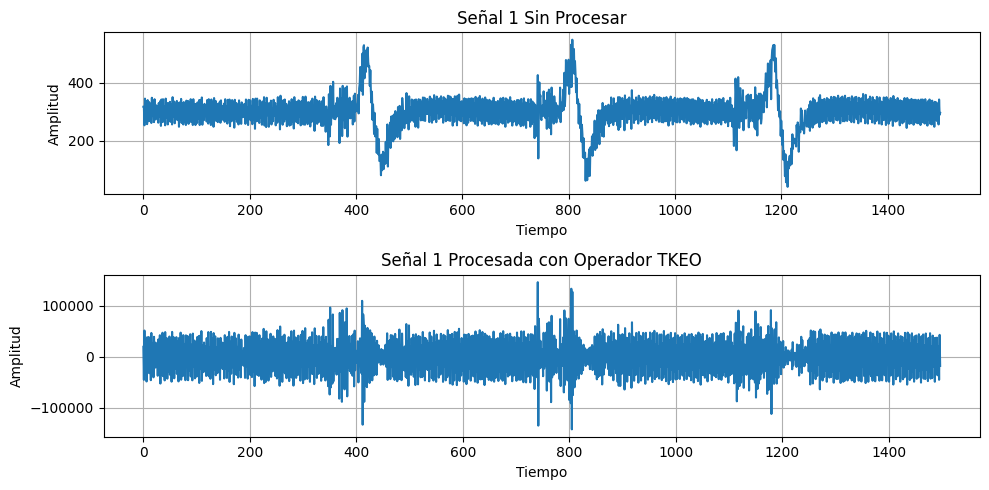

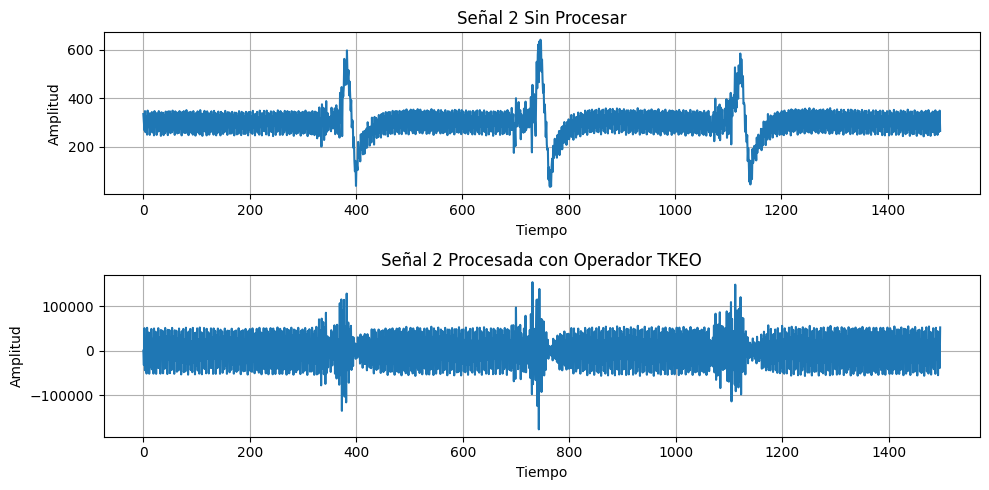

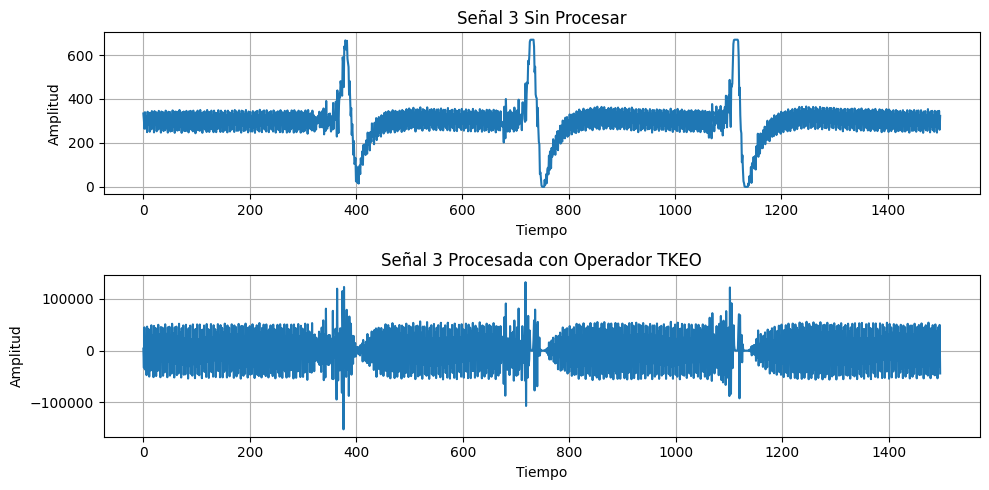

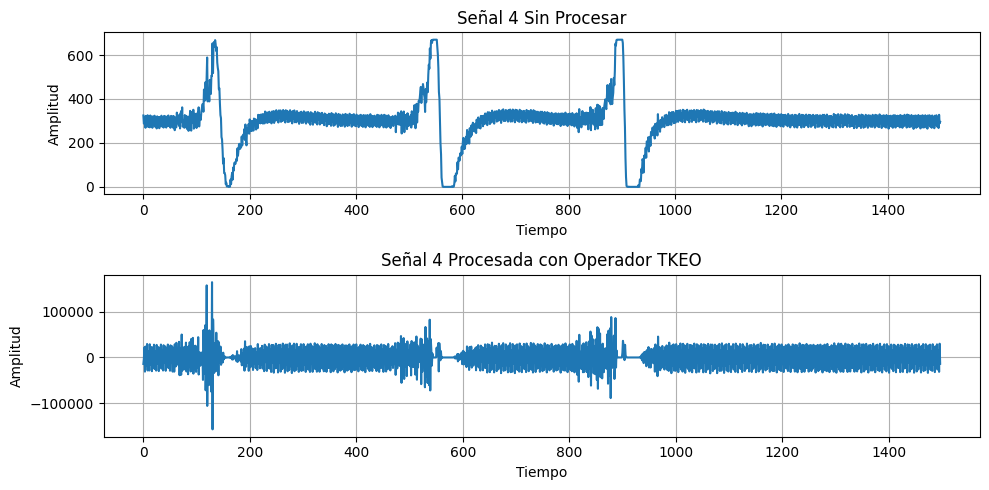

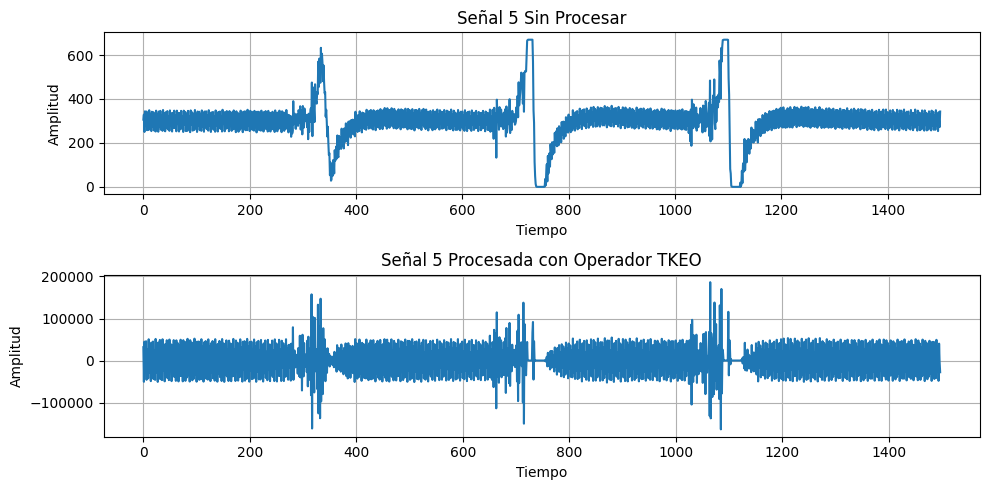

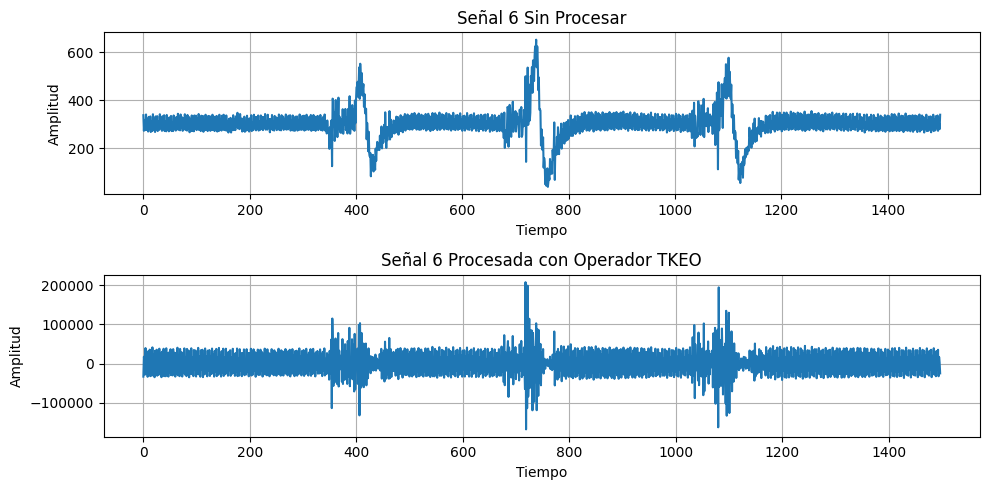

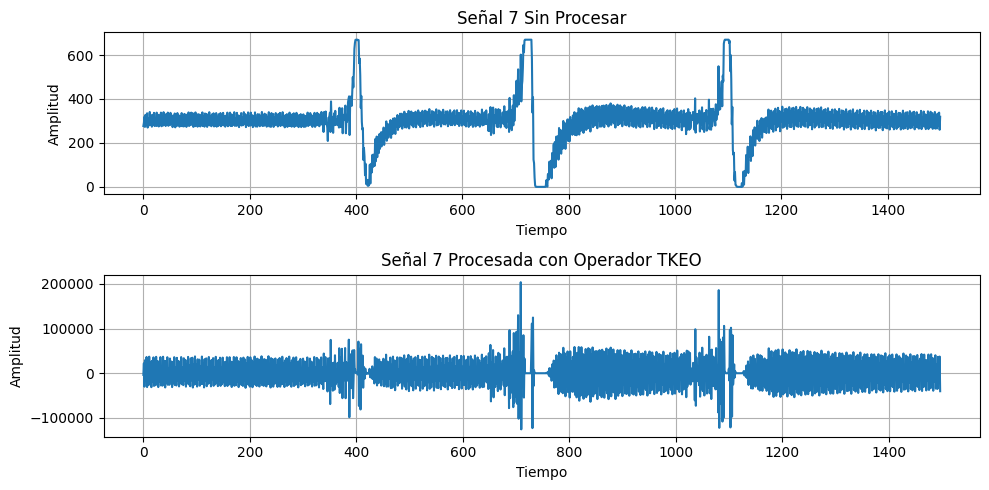

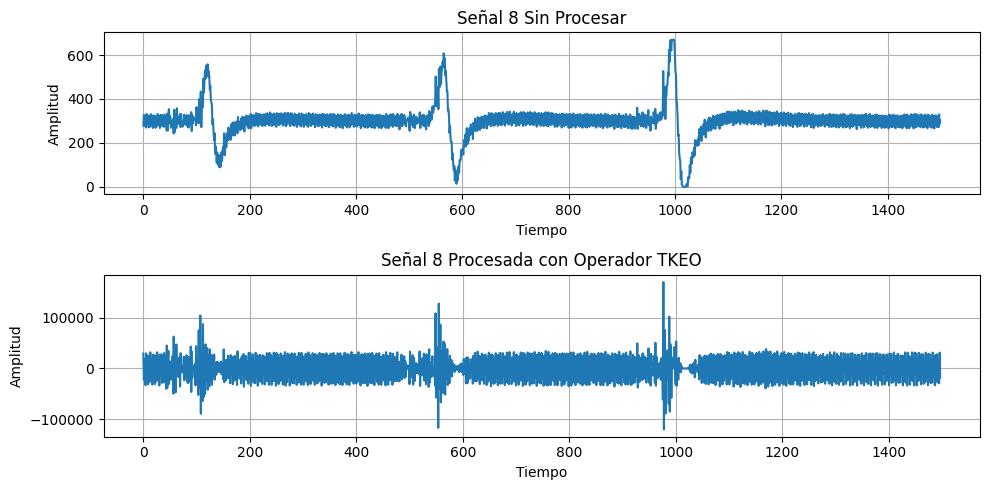

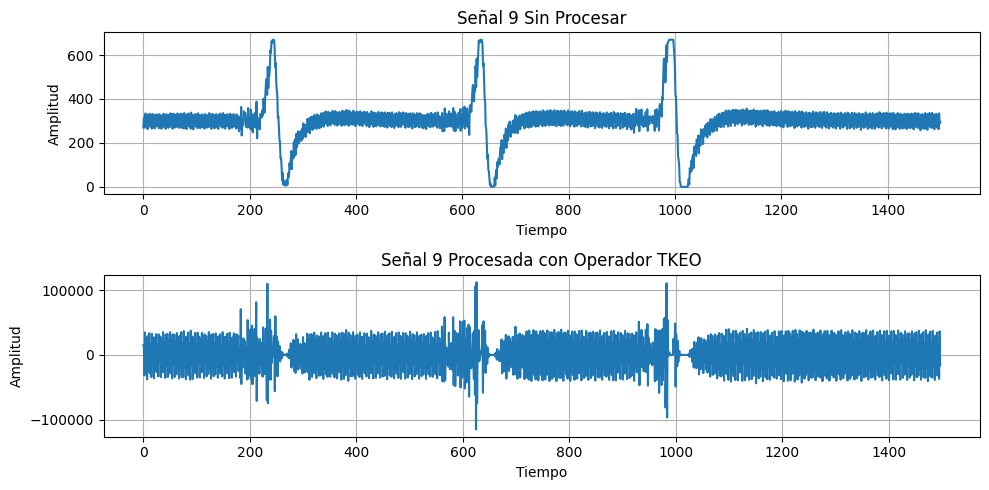

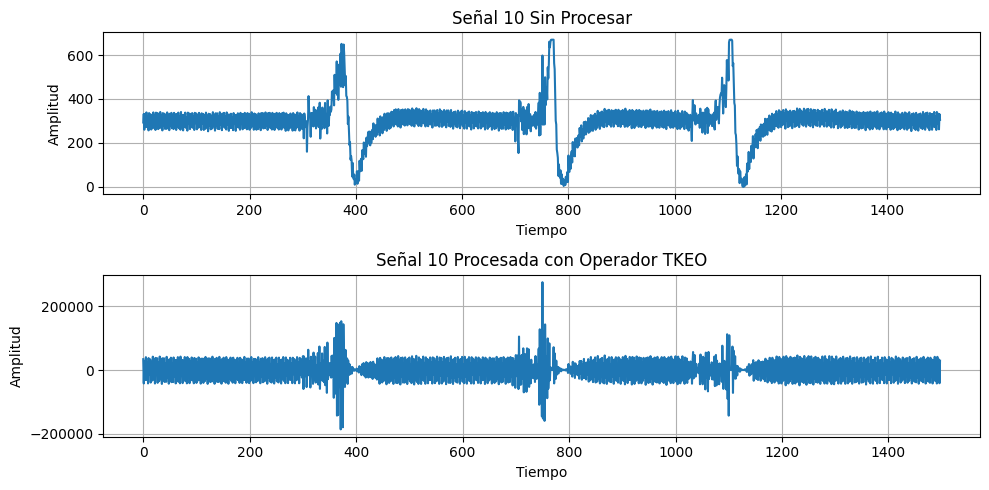

In [117]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el operador TKEO
def calcular_tkeo(señal):
    tkeo = señal[1:-1] ** 2 - señal[:-2] * señal[2:]
    return tkeo

# Archivos que contienen las señales
archivos = ['senal1.mat', 'senal2.mat', 'senal3.mat', 'senal4.mat', 'senal5.mat',
            'senal6.mat', 'senal7.mat', 'senal8.mat', 'senal9.mat', 'senal10.mat']
senalestkeo=[]
# Iterar sobre cada archivo y graficar cada señal sin procesar y procesada
for i, archivo in enumerate(archivos, 1):
    # Cargar la señal sin procesar
    data = sio.loadmat('/content/senales/'+ archivo)
    señal_sin_procesar = data['EMG'][0]

    # Calcular la señal procesada
    señal_procesada = calcular_tkeo(señal_sin_procesar)
    senalestkeo.append(señal_procesada)
    # Configurar el tamaño del gráfico
    plt.figure(figsize=(10, 5))

    # Graficar la señal sin procesar
    tiempo = range(len(señal_sin_procesar))
    plt.subplot(2, 1, 1)
    plt.plot(tiempo, señal_sin_procesar)
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.title(f'Señal {i} Sin Procesar')
    plt.grid(True)

    # Graficar la señal procesada
    tiempo = range(len(señal_procesada))
    plt.subplot(2, 1, 2)
    plt.plot(tiempo, señal_procesada)
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.title(f'Señal {i} Procesada con Operador TKEO')
    plt.grid(True)

    # Mostrar el gráfico de esta señal
    plt.tight_layout()
    plt.show()


Como era de esperarse, en las 9 señales restantes tambien se produjo un aumento de la amplitud al igual que en la señal 1. Es posible que las señales EMG que estamos empleando tengan características particulares que causen este aumento en la amplitud después de aplicar el operador TKEO. Por ejemplo, si las señales tienen picos de alta energía o componentes de alta frecuencia, es probable que el operador TKEO los enfatice, lo que resulta en un aumento de la amplitud.

In [118]:
len(senalestkeo)

10

In [119]:
len(archivos)

10

**Proceso para segmentar gestos- Etapa sin TKEO**

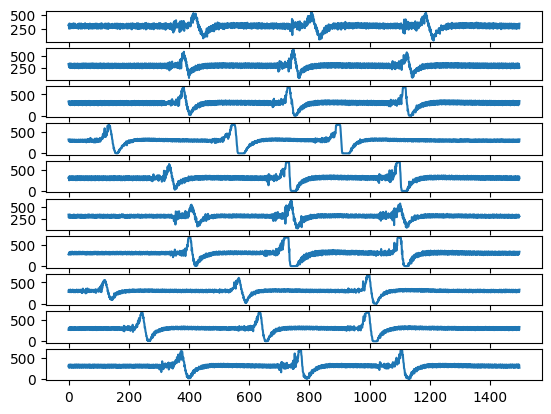

In [120]:
#Imprimi todas las señales nuevamente para buscar un rango en el cual pudiera ser extraido el gesto correspondiente a la flexion
# y el gesto correspondiente a la extension
import scipy.io
import matplotlib.pyplot as plt

for i in range(len(archivos)):
    # Cargar los datos del archivo
    data = scipy.io.loadmat('/content/senales/'+ archivos[i])
    # Acceder a los datos de la señal
    senal = data['EMG']
    # Ajustar la dimensión de tiempo
    senal_ajustada = senal[0][:len(tiempo)]
    # Plotear los datos
    plt.subplot(len(archivos), 1, i+1)
    plt.plot(tiempo, senal_ajustada)


**Seleccion del fragmento a usar como gesto "reposo" o movimiento de "extensión**

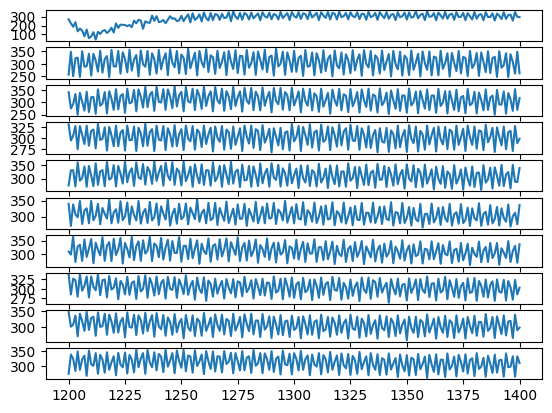

In [121]:
#Plot de la etapa seleccionada para el gesto de reposo en la etapa sin TKEO
import scipy.io
import matplotlib.pyplot as plt

Gesto_resposo_tin_tkeo = []

for i in range(len(archivos)):
    # Cargar los datos del archivo
    data = scipy.io.loadmat('/content/senales/'+ archivos[i])
    # Acceder a los datos de la señal
    senal = data['EMG']
    # Ajustar la dimensión de tiempo
    senal_ajustada = senal[0][1200:1401]  # Tomar los elementos desde el índice 1200 hasta el índice 1400
    # Crear una lista de índices de tiempo correspondiente
    tiempo_recortado = tiempo[1200:1401]  # Tomar los elementos desde el índice 1200 hasta el índice 1400
    # Plotear los datos
    plt.subplot(len(archivos), 1, i+1)
    plt.plot(tiempo_recortado, senal_ajustada)
    # Agregar la señal recortada a la lista Gesto_resposo_tin_tkeo
    Gesto_resposo_tin_tkeo.append(senal_ajustada)


Se decidió tomar los elementos desde el índice 1200 hasta el índice 1400, el cual será el fragmento a usar como gesto "reposo" o movimiento de "extensión, debido a que se observa un comportamiento uniforme de todas las señales en este rango.

In [122]:
#Datos estadisticos para la primera parte extraida
import numpy as np
import pandas as pd

# Funciones para calcular características de la señal EMG
def calcular_rms(signal):
    signal_np = np.array(signal)
    return np.sqrt(np.mean(signal_np ** 2))

def calcular_varianza(signal):
    signal_np = np.array(signal)
    return np.var(signal_np)

def calcular_mav(signal):
    signal_np = np.array(signal)
    return np.mean(np.abs(signal_np))

def calcular_mavs(signal):
    signal_np = np.array(signal)
    return np.mean(np.abs(np.diff(signal_np)))

def calcular_cambios_pendiente(signal):
    signal_np = np.array(signal)
    cambios_pendiente = np.diff(np.sign(np.diff(signal_np)))
    return len(cambios_pendiente[cambios_pendiente != 0])

def calcular_longitud_onda(signal):
    signal_np = np.array(signal)
    return np.sum(np.abs(np.diff(signal_np)))

def calcular_cruces_cero(signal):
    signal_np = np.array(signal)
    return np.sum(np.abs(np.diff(np.sign(signal_np)))) / 2

def calcular_datos_señal(signal):
    rms = calcular_rms(signal)
    varianza = calcular_varianza(signal)
    mav = calcular_mav(signal)
    mavs = calcular_mavs(signal)
    cambios_pendiente = calcular_cambios_pendiente(signal)
    longitud_onda = calcular_longitud_onda(signal)
    cruces_cero = calcular_cruces_cero(signal)

    return {
        'RMS (E-T)': rms,
        'Varianza (E-T)': varianza,
        'Mean Absolute Value (E-T)': mav,
        'Mean Absolute Value Slope (E-T)': mavs,
        'Slope Sign Changes (E-T)': cambios_pendiente,
        'Wave form length (E-T)': longitud_onda,
        'Zero Crossing (E-T)': cruces_cero
    }

# Lista para almacenar los datos de cada señal
datos_Gesto_resposo_tin_tkeo = []

# Iterar sobre todas las señales de gesto de flexión
for signal in Gesto_resposo_tin_tkeo:
    # Calcular los datos para esta señal
    datos_señal = calcular_datos_señal(signal)
    datos_Gesto_resposo_tin_tkeo.append(datos_señal)

# Crear un DataFrame de Pandas para almacenar los datos de las señales de gesto de flexión
df_Gesto_resposo_tin_tkeo = pd.DataFrame(datos_Gesto_resposo_tin_tkeo)


**DATA FRAME DE LOS GESTOS EN EXTENSION SIN TKEO**

In [123]:
df_Gesto_resposo_tin_tkeo

,RMS (E-T),Varianza (E-T),Mean Absolute Value (E-T),Mean Absolute Value Slope (E-T),Slope Sign Changes (E-T),Wave form length (E-T),Zero Crossing (E-T)
0,287.856688,4182.618153,280.497512,51.410,152,10282,0.0
1,308.116134,1348.262320,305.920398,61.365,154,12273,0.0
2,312.726018,1302.330784,310.636816,59.945,156,11989,0.0
3,303.239869,449.672879,302.497512,35.275,154,7055,0.0
4,313.326590,1083.952971,311.592040,54.710,153,10942,0.0
5,307.629041,649.150269,306.572139,41.790,154,8358,0.0
6,312.975187,984.747061,311.398010,51.380,157,10276,0.0
7,304.690455,471.689364,303.915423,35.755,153,7151,0.0
8,307.173254,679.821688,306.064677,43.090,154,8618,0.0
9,312.504424,848.252816,311.144279,47.880,154,9576,0.0


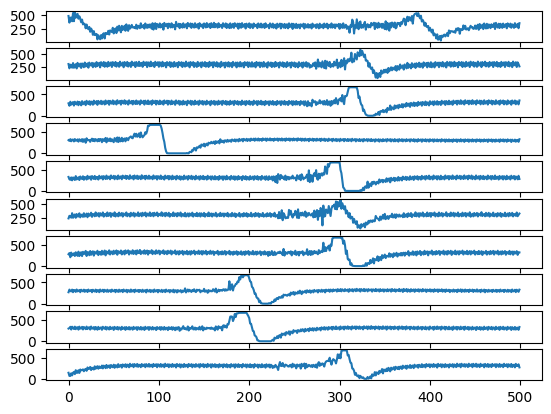

In [124]:
#Se repite el proceso tomando tiempos distintos para seleccionar una etapa de actividad muscular
import scipy.io
import matplotlib.pyplot as plt

# Suponiendo que tienes una lista de nombres de archivos llamada `archivos`
gesto_flexion_sin_tkeo = []

for i in range(len(archivos)):
    # Cargar los datos del archivo
    data = scipy.io.loadmat('/content/senales/'+ archivos[i])
    # Acceder a los datos de la señal
    senal = data['EMG']
    # Ajustar la dimensión de tiempo
    senal_ajustada = senal[0][800:1300]  # Tomar los elementos desde el índice 800 hasta el índice 1300
    # Plotear los datos
    plt.subplot(len(archivos), 1, i+1)
    plt.plot(senal_ajustada)
    # Agregar la señal recortada a la lista gesto_flexion_sin_tkeo
    gesto_flexion_sin_tkeo.append(senal_ajustada)


Se decidio tomar los elementos desde el índice 800 hasta el índice 1300, debido a que en este intervalo se presenta un pico en las 10 señales, que representa el movimiento muscular (en este caso de flexión) realizado

In [125]:
import numpy as np
import pandas as pd

# Funciones para calcular características de la señal EMG
def calcular_rms(signal):
    signal_np = np.array(signal)
    return np.sqrt(np.mean(signal_np ** 2))

def calcular_varianza(signal):
    signal_np = np.array(signal)
    return np.var(signal_np)

def calcular_mav(signal):
    signal_np = np.array(signal)
    return np.mean(np.abs(signal_np))

def calcular_mavs(signal):
    signal_np = np.array(signal)
    return np.mean(np.abs(np.diff(signal_np)))

def calcular_cambios_pendiente(signal):
    signal_np = np.array(signal)
    cambios_pendiente = np.diff(np.sign(np.diff(signal_np)))
    return len(cambios_pendiente[cambios_pendiente != 0])

def calcular_longitud_onda(signal):
    signal_np = np.array(signal)
    return np.sum(np.abs(np.diff(signal_np)))

def calcular_cruces_cero(signal):
    signal_np = np.array(signal)
    return np.sum(np.abs(np.diff(np.sign(signal_np)))) / 2

def calcular_datos_señal(signal):
    rms = calcular_rms(signal)
    varianza = calcular_varianza(signal)
    mav = calcular_mav(signal)
    mavs = calcular_mavs(signal)
    cambios_pendiente = calcular_cambios_pendiente(signal)
    longitud_onda = calcular_longitud_onda(signal)
    cruces_cero = calcular_cruces_cero(signal)

    return {
        'RMS (F-T)': rms,
        'Varianza (F-T)': varianza,
        'Mean Absolute Value (F-T)': mav,
        'Mean Absolute Value Slope (F-T)': mavs,
        'Slope Sign Changes (F-T)': cambios_pendiente,
        'Wave form length (F-T)': longitud_onda,
        'Zero Crossing (F-T)': cruces_cero
    }

# Lista para almacenar los datos de cada señal
datos_gesto_flexion_sin_tkeo = []

# Iterar sobre todas las señales de gesto de flexión sin tkeo
for signal in gesto_flexion_sin_tkeo:
    # Calcular los datos para esta señal
    datos_señal = calcular_datos_señal(signal)
    datos_gesto_flexion_sin_tkeo.append(datos_señal)

# Crear un DataFrame de Pandas para almacenar los datos de las señales de gesto de flexión sin tkeo
df_gesto_flexion_sin_tkeo = pd.DataFrame(datos_gesto_flexion_sin_tkeo)


**DATA FRAME DE LOS GESTOS EN FLEXIÓN SIN TKEO**

In [126]:
df_gesto_flexion_sin_tkeo

,RMS (F-T),Varianza (F-T),Mean Absolute Value (F-T),Mean Absolute Value Slope (F-T),Slope Sign Changes (F-T),Wave form length (F-T),Zero Crossing (F-T)
0,306.021999,5744.329856,296.488,56.557114,381,28222,0.0
1,307.909058,3649.886224,301.924,62.675351,387,31275,0.0
2,313.247975,8501.897100,299.370,58.641283,370,29262,1.0
3,320.657780,11561.835536,302.092,35.727455,359,17828,3.0
4,319.050328,10301.381424,302.476,56.559118,361,28223,1.0
5,308.584766,3467.666604,302.914,49.392786,382,24647,0.0
6,320.260887,9681.064016,304.772,54.977956,375,27434,1.0
7,314.023066,7890.250796,301.198,36.358717,364,18143,1.0
8,319.251421,10222.728876,302.818,40.709419,357,20314,1.0
9,309.421295,8472.106604,295.414,47.569138,369,23737,1.0


In [127]:
# Concatenar los DataFrames horizontalmente
df_concatenadostkf = pd.concat([df_gesto_flexion_sin_tkeo, df_Gesto_resposo_tin_tkeo], axis=1)


**CONCATENACIÓN**

In [128]:
df_concatenadostkf

,RMS (F-T),Varianza (F-T),Mean Absolute Value (F-T),Mean Absolute Value Slope (F-T),Slope Sign Changes (F-T),Wave form length (F-T),Zero Crossing (F-T),RMS (E-T),Varianza (E-T),Mean Absolute Value (E-T),Mean Absolute Value Slope (E-T),Slope Sign Changes (E-T),Wave form length (E-T),Zero Crossing (E-T)
0,306.021999,5744.329856,296.488,56.557114,381,28222,0.0,287.856688,4182.618153,280.497512,51.410,152,10282,0.0
1,307.909058,3649.886224,301.924,62.675351,387,31275,0.0,308.116134,1348.262320,305.920398,61.365,154,12273,0.0
2,313.247975,8501.897100,299.370,58.641283,370,29262,1.0,312.726018,1302.330784,310.636816,59.945,156,11989,0.0
3,320.657780,11561.835536,302.092,35.727455,359,17828,3.0,303.239869,449.672879,302.497512,35.275,154,7055,0.0
4,319.050328,10301.381424,302.476,56.559118,361,28223,1.0,313.326590,1083.952971,311.592040,54.710,153,10942,0.0
5,308.584766,3467.666604,302.914,49.392786,382,24647,0.0,307.629041,649.150269,306.572139,41.790,154,8358,0.0
6,320.260887,9681.064016,304.772,54.977956,375,27434,1.0,312.975187,984.747061,311.398010,51.380,157,10276,0.0
7,314.023066,7890.250796,301.198,36.358717,364,18143,1.0,304.690455,471.689364,303.915423,35.755,153,7151,0.0
8,319.251421,10222.728876,302.818,40.709419,357,20314,1.0,307.173254,679.821688,306.064677,43.090,154,8618,0.0
9,309.421295,8472.106604,295.414,47.569138,369,23737,1.0,312.504424,848.252816,311.144279,47.880,154,9576,0.0


**PRUEBAS PARA DATOS SIN TKEO**

Se plantean dos hipótesis:

*   La hipótesis nula (H0​): No hay diferencia significativa entre las características medidas en los gestos de flexión y reposo.
*   La hipótesis alternativa (H1): Existe una diferencia significativa entre las características medidas en los gestos de flexión y reposo.

Se realizó inicialmente un prueba de Shapiro-Wilk, la cual es una prueba de normalidad utilizada para determinar que muestras de datos proviene de una población con una distribución normal.

In [129]:
import pandas as pd
import scipy.stats as stats

# Suponiendo que tienes el DataFrame df_concatenado definido

# Nivel de significancia
nivel_significancia = 0.05

# Listas para almacenar las métricas que cumplen y no cumplen con una distribución normal
metricas_normales = []
metricas_no_normales = []

# Iterar sobre las columnas en el DataFrame (excluyendo la columna 'Fuente' y 'Tipo de dato')
for metric in df_concatenadostkf.columns:
    # Realizar la prueba de normalidad Shapiro-Wilk
    valor_p = stats.shapiro(df_concatenadostkf[metric])[1]

    # Comprobar el valor p y determinar si los datos siguen una distribución normal
    if valor_p < nivel_significancia:
        metricas_no_normales.append((metric, round(valor_p, 2)))
    else:
        metricas_normales.append((metric, round(valor_p, 2)))

# Imprimir las métricas que cumplen con una distribución normal y sus valores p
print("Métricas que siguen una distribución normal:")
for metrica, valor_p in metricas_normales:
    print(f"{metrica}: Valor p = {valor_p}")

# Imprimir las métricas que no cumplen con una distribución normal y sus valores p
print("\nMétricas que NO siguen una distribución normal:")
for metrica, valor_p in metricas_no_normales:
    print(f"{metrica}: Valor p = {valor_p}")


Métricas que siguen una distribución normal:
RMS (F-T): Valor p = 0.15
Varianza (F-T): Valor p = 0.26
Mean Absolute Value (F-T): Valor p = 0.14
Mean Absolute Value Slope (F-T): Valor p = 0.31
Slope Sign Changes (F-T): Valor p = 0.58
Wave form length (F-T): Valor p = 0.31
Mean Absolute Value Slope (E-T): Valor p = 0.61
Slope Sign Changes (E-T): Valor p = 0.12
Wave form length (E-T): Valor p = 0.61
Zero Crossing (E-T): Valor p = 1.0

Métricas que NO siguen una distribución normal:
Zero Crossing (F-T): Valor p = 0.0
RMS (E-T): Valor p = 0.01
Varianza (E-T): Valor p = 0.0
Mean Absolute Value (E-T): Valor p = 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [130]:
# Seleccionamos las características que siguen una distribución normal en df_concatenadostkf
caracteristicas_normales_concatenadostkf = ['RMS (F-T)', 'Varianza (F-T)', 'Mean Absolute Value (F-T)',
                                            'Mean Absolute Value Slope (F-T)', 'Slope Sign Changes (F-T)',
                                            'Wave form length (F-T)', 'Mean Absolute Value Slope (E-T)', 'Slope Sign Changes (E-T)',
                                            'Zero Crossing (E-T)']

# Realizamos la prueba T de Student para cada característica
for caracteristica in caracteristicas_normales_concatenadostkf:
    grupo_sin_tkeo = df_concatenadostkf[caracteristica][:10]
    grupo_con_tkeo = df_concatenadostkf[caracteristica][10:]
    t_statistic, p_value = stats.ttest_ind(grupo_sin_tkeo, grupo_con_tkeo)
    print(f"Característica: {caracteristica}")
    if p_value < 0.05:
        print("Diferencia significativa entre los grupos\n")
    else:
        print("No hay diferencia significativa entre los grupos\n")


Característica: RMS (F-T)
No hay diferencia significativa entre los grupos

Característica: Varianza (F-T)
No hay diferencia significativa entre los grupos

Característica: Mean Absolute Value (F-T)
No hay diferencia significativa entre los grupos

Característica: Mean Absolute Value Slope (F-T)
No hay diferencia significativa entre los grupos

Característica: Slope Sign Changes (F-T)
No hay diferencia significativa entre los grupos

Característica: Wave form length (F-T)
No hay diferencia significativa entre los grupos

Característica: Mean Absolute Value Slope (E-T)
No hay diferencia significativa entre los grupos

Característica: Slope Sign Changes (E-T)
No hay diferencia significativa entre los grupos

Característica: Zero Crossing (E-T)
No hay diferencia significativa entre los grupos



El anterior código realiza una prueba T de Student para comparar muestras de características específicas entre dos grupos: un grupo de gesto de flexión y otro grupo de gesto de reposo, ambos sin el operador TKEO aplicado. Se seleccionan características específicas que se supone siguen una distribución normal en df_concatenadostkf. Esto es importante porque la prueba T de Student asume que los datos provienen de una distribución normal.La función stats.ttest_ind() se utiliza para realizar la prueba T de Student para muestras independientes y devuelve el valor de la estadística T y el valor p. Un valor p mayor que 0.05 generalmente se considera estadísticamente significativo, lo que indica que no hay una diferencia significativa entre los grupos.
Los resultados indican que no hay una diferencia significativa entre los grupos de gesto de flexión y reposo para cada una de las características analizadas. Esto significa que, según la prueba T de Student, por lo que no se rechaza la hipotesis nula debido a que no hay evidencia suficiente para afirmar que las características que cumplen con una distribución normal son diferentes entre los dos grupos.


**Etapa con TKEO donde se repiten los mismos pasos aplicados anteriormente**


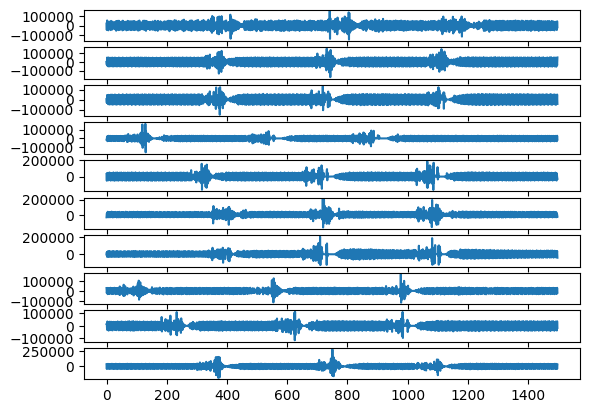

In [131]:
for i in range(len(senalestkeo)):
  plt.subplot(len(senalestkeo),1,i+1)
  plt.plot(tiempo,senalestkeo[i])

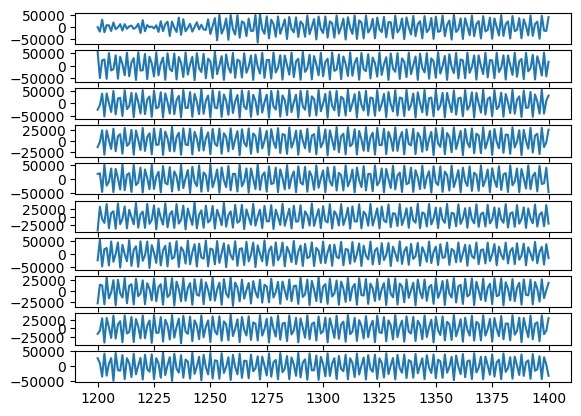

In [132]:
gesto_reposo = []  # Lista para almacenar las señales de gesto de reposo

for i in range(len(senalestkeo)):
    # Convertir el rango de tiempo a una lista
    tiempo_lista = list(tiempo)

    # Filtrar la señal para el tiempo entre 1200 y 1400
    tiempo_recortado = [t for t in tiempo_lista if 1200 <= t <= 1400]
    senal_recortada = [senalestkeo[i][j] for j, t in enumerate(tiempo_lista) if 1200 <= t <= 1400]

    # Graficar y almacenar la señal recortada
    plt.subplot(len(senalestkeo), 1, i+1)
    plt.plot(tiempo_recortado, senal_recortada)
    gesto_reposo.append(senal_recortada)

plt.show()


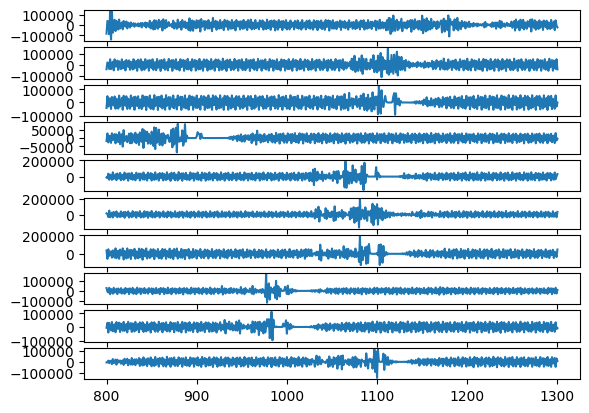

In [133]:
gesto_flexion = []  # Lista para almacenar las señales de gesto de flexión

for i in range(len(senalestkeo)):
    # Convertir el rango de tiempo a una lista
    tiempo_lista = list(tiempo)

    # Filtrar la señal para el tiempo entre 800 y 1300
    tiempo_recortado = [t for t in tiempo_lista if 800 <= t <= 1300]
    senal_recortada = [senalestkeo[i][j] for j, t in enumerate(tiempo_lista) if 800 <= t <= 1300]

    # Graficar y almacenar la señal recortada
    plt.subplot(len(senalestkeo), 1, i+1)
    plt.plot(tiempo_recortado, senal_recortada)
    gesto_flexion.append(senal_recortada)

plt.show()


In [134]:
# Funciones para calcular características de la señal EMG
def calcular_rms(señal):
    señal_np = np.array(señal)
    return np.sqrt(np.mean(señal_np ** 2))

def calcular_varianza(señal):
    señal_np = np.array(señal)
    return np.var(señal_np)

def calcular_mav(señal):
    señal_np = np.array(señal)
    return np.mean(np.abs(señal_np))

def calcular_mavs(señal):
    señal_np = np.array(señal)
    return np.mean(np.abs(np.diff(señal_np)))

def calcular_cambios_pendiente(señal):
    señal_np = np.array(señal)
    cambios_pendiente = np.diff(np.sign(np.diff(señal_np)))
    return len(cambios_pendiente[cambios_pendiente != 0])

def calcular_longitud_onda(señal):
    señal_np = np.array(señal)
    return np.sum(np.abs(np.diff(señal_np)))

def calcular_cruces_cero(señal):
    señal_np = np.array(señal)
    return np.sum(np.abs(np.diff(np.sign(señal_np)))) / 2

def calcular_datos_señal(señal):
    rms = calcular_rms(señal)
    varianza = calcular_varianza(señal)
    mav = calcular_mav(señal)
    mavs = calcular_mavs(señal)
    cambios_pendiente = calcular_cambios_pendiente(señal)
    longitud_onda = calcular_longitud_onda(señal)
    cruces_cero = calcular_cruces_cero(señal)

    return {
        'RMS (F+T)': rms,
        'Varianza (F+T)': varianza,
        'Mean Absolute Value (F+T)': mav,
        'Mean Absolute Value Slope (F+T)': mavs,
        'Slope Sign Changes (F+T)': cambios_pendiente,
        'Wave form length (F+T)': longitud_onda,
        'Zero Crossing (F+T)': cruces_cero
    }

# Lista para almacenar los datos de cada señal
datos_señales_flexion = []

# Iterar sobre todas las señales de gesto de flexión
for señal in gesto_flexion:
    # Calcular los datos para esta señal
    datos_señal = calcular_datos_señal(señal)
    datos_señales_flexion.append(datos_señal)

# Crear un DataFrame de Pandas para almacenar los datos de las señales de gesto de flexión
df_flexion = pd.DataFrame(datos_señales_flexion)


In [135]:
df_flexion

,RMS (F+T),Varianza (F+T),Mean Absolute Value (F+T),Mean Absolute Value Slope (F+T),Slope Sign Changes (F+T),Wave form length (F+T),Zero Crossing (F+T)
0,19686.772726,1.371953e+09,31077.504990,57723.044,385,28861522,384.0
1,9102.109823,1.675635e+09,35548.421158,66524.752,385,33262376,386.0
2,9451.327958,1.433244e+09,32636.485030,60568.340,376,30284170,372.0
3,20092.873890,5.917409e+08,19992.720559,36888.364,366,18444182,358.0
4,15372.300054,1.605339e+09,32145.952096,59787.282,371,29893641,365.0
5,24621.921436,1.307823e+09,28402.229541,52957.494,383,26478747,384.0
6,16376.367573,1.492105e+09,31836.778443,59583.212,377,29791606,374.0
7,21375.919101,6.621495e+08,20695.063872,38516.518,380,19258259,378.0
8,24080.004269,7.334868e+08,22792.343313,42495.000,372,21247500,364.0
9,25615.603208,9.721635e+08,25850.121756,48092.336,380,24046168,374.0


In [136]:
# Funciones para calcular características de la señal EMG
def calcular_rms(señal):
    señal_np = np.array(señal)
    return np.sqrt(np.mean(señal_np ** 2))

def calcular_varianza(señal):
    señal_np = np.array(señal)
    return np.var(señal_np)

def calcular_mav(señal):
    señal_np = np.array(señal)
    return np.mean(np.abs(señal_np))

def calcular_mavs(señal):
    señal_np = np.array(señal)
    return np.mean(np.abs(np.diff(señal_np)))

def calcular_cambios_pendiente(señal):
    señal_np = np.array(señal)
    cambios_pendiente = np.diff(np.sign(np.diff(señal_np)))
    return len(cambios_pendiente[cambios_pendiente != 0])

def calcular_longitud_onda(señal):
    señal_np = np.array(señal)
    return np.sum(np.abs(np.diff(señal_np)))

def calcular_cruces_cero(señal):
    señal_np = np.array(señal)
    return np.sum(np.abs(np.diff(np.sign(señal_np)))) / 2

def calcular_datos_señal(señal):
    rms = calcular_rms(señal)
    varianza = calcular_varianza(señal)
    mav = calcular_mav(señal)
    mavs = calcular_mavs(señal)
    cambios_pendiente = calcular_cambios_pendiente(señal)
    longitud_onda = calcular_longitud_onda(señal)
    cruces_cero = calcular_cruces_cero(señal)

    return {
        'RMS (E+T)': rms,
        'Varianza (E+T)': varianza,
        'Mean Absolute Value (E+T)': mav,
        'Mean Absolute Value Slope (E+T)': mavs,
        'Slope Sign Changes (E+T)': cambios_pendiente,
        'Wave form length (E+T)': longitud_onda,
        'Zero Crossing (E+T)': cruces_cero
    }

# Lista para almacenar los datos de cada señal de reposo
datos_señales_reposo = []

# Iterar sobre todas las señales de gesto de reposo
for señal in gesto_reposo:
    # Calcular los datos para esta señal
    datos_señal = calcular_datos_señal(señal)
    datos_señales_reposo.append(datos_señal)

# Crear un DataFrame de Pandas para almacenar los datos de las señales de gesto de reposo
df_reposo = pd.DataFrame(datos_señales_reposo)


<ipython-input-136-ae1b0a6d17c3>:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.mean(señal_np ** 2))


In [137]:
#Como el RMS me da NAN lo reemplazo con un 0
df_reposo = df_reposo.fillna(0)


In [138]:
df_reposo


,RMS (E+T),Varianza (E+T),Mean Absolute Value (E+T),Mean Absolute Value Slope (E+T),Slope Sign Changes (E+T),Wave form length (E+T),Zero Crossing (E+T)
0,16596.371229,1.000878e+09,27257.402985,50934.505,155,10186901,155.0
1,0.000000,1.502716e+09,35025.616915,65256.930,153,13051386,154.0
2,3359.544609,1.484294e+09,34691.691542,64711.625,152,12942325,153.0
3,22131.685781,4.896232e+08,19923.800995,37127.765,152,7425553,153.0
4,13768.417505,1.257094e+09,31902.069652,59491.530,153,11898306,153.0
5,26818.458538,7.190271e+08,23962.830846,44844.115,153,8968823,154.0
6,24521.143219,1.113389e+09,29841.084577,56104.255,153,11220851,154.0
7,22540.641425,5.079111e+08,20354.402985,37682.345,152,7536469,153.0
8,27362.517603,7.483141e+08,24641.706468,45926.630,152,9185326,153.0
9,29842.849741,9.541315e+08,27804.706468,51819.705,152,10363941,153.0


In [139]:
# Concatenar los DataFrames horizontalmente
df_concatenado = pd.concat([df_flexion, df_reposo], axis=1)


**Data frame concatenado para ambas etapas del movimiento ademas de la aplicacion del TKEO**

In [140]:
df_concatenado


,RMS (F+T),Varianza (F+T),Mean Absolute Value (F+T),Mean Absolute Value Slope (F+T),Slope Sign Changes (F+T),Wave form length (F+T),Zero Crossing (F+T),RMS (E+T),Varianza (E+T),Mean Absolute Value (E+T),Mean Absolute Value Slope (E+T),Slope Sign Changes (E+T),Wave form length (E+T),Zero Crossing (E+T)
0,19686.772726,1.371953e+09,31077.504990,57723.044,385,28861522,384.0,16596.371229,1.000878e+09,27257.402985,50934.505,155,10186901,155.0
1,9102.109823,1.675635e+09,35548.421158,66524.752,385,33262376,386.0,0.000000,1.502716e+09,35025.616915,65256.930,153,13051386,154.0
2,9451.327958,1.433244e+09,32636.485030,60568.340,376,30284170,372.0,3359.544609,1.484294e+09,34691.691542,64711.625,152,12942325,153.0
3,20092.873890,5.917409e+08,19992.720559,36888.364,366,18444182,358.0,22131.685781,4.896232e+08,19923.800995,37127.765,152,7425553,153.0
4,15372.300054,1.605339e+09,32145.952096,59787.282,371,29893641,365.0,13768.417505,1.257094e+09,31902.069652,59491.530,153,11898306,153.0
5,24621.921436,1.307823e+09,28402.229541,52957.494,383,26478747,384.0,26818.458538,7.190271e+08,23962.830846,44844.115,153,8968823,154.0
6,16376.367573,1.492105e+09,31836.778443,59583.212,377,29791606,374.0,24521.143219,1.113389e+09,29841.084577,56104.255,153,11220851,154.0
7,21375.919101,6.621495e+08,20695.063872,38516.518,380,19258259,378.0,22540.641425,5.079111e+08,20354.402985,37682.345,152,7536469,153.0
8,24080.004269,7.334868e+08,22792.343313,42495.000,372,21247500,364.0,27362.517603,7.483141e+08,24641.706468,45926.630,152,9185326,153.0
9,25615.603208,9.721635e+08,25850.121756,48092.336,380,24046168,374.0,29842.849741,9.541315e+08,27804.706468,51819.705,152,10363941,153.0


**PRUEBAS PARA DATOS CON TKEO**

Se plantean dos hipótesis:

*   La hipótesis nula (H0​): No hay diferencia significativa entre las características medidas en los gestos de flexión y reposo.
*   La hipótesis alternativa (H1): Existe una diferencia significativa entre las características medidas en los gestos de flexión y reposo.

Se realizó inicialmente un prueba de Shapiro-Wilk, la cual es una prueba de normalidad utilizada para determinar que muestras de datos proviene de una población con una distribución normal.

In [141]:
# Nivel de significancia
nivel_significancia = 0.05

# Listas para almacenar las métricas que cumplen y no cumplen con una distribución normal
metricas_normales = []
metricas_no_normales = []

# Iterar sobre las columnas en el DataFrame
for metric in df_concatenado.columns:
    # Realizar la prueba de normalidad Shapiro-Wilk
    valor_p = stats.shapiro(df_concatenado[metric])[1]

    # Comprobar el valor p y determinar si los datos siguen una distribución normal
    if valor_p < nivel_significancia:
        metricas_no_normales.append((metric, round(valor_p, 2)))
    else:
        metricas_normales.append((metric, round(valor_p, 2)))

# Imprimir las métricas que cumplen con una distribución normal y sus valores p
print("Métricas que siguen una distribución normal:")
for metrica, valor_p in metricas_normales:
    print(f"{metrica}: Valor p = {valor_p}")

# Imprimir las métricas que no cumplen con una distribución normal y sus valores p
print("\nMétricas que NO siguen una distribución normal:")
for metrica, valor_p in metricas_no_normales:
    print(f"{metrica}: Valor p = {valor_p}")



Métricas que siguen una distribución normal:
RMS (F+T): Valor p = 0.29
Varianza (F+T): Valor p = 0.17
Mean Absolute Value (F+T): Valor p = 0.32
Mean Absolute Value Slope (F+T): Valor p = 0.35
Slope Sign Changes (F+T): Valor p = 0.57
Wave form length (F+T): Valor p = 0.35
Zero Crossing (F+T): Valor p = 0.56
RMS (E+T): Valor p = 0.14
Varianza (E+T): Valor p = 0.53
Mean Absolute Value (E+T): Valor p = 0.6
Mean Absolute Value Slope (E+T): Valor p = 0.56
Wave form length (E+T): Valor p = 0.56

Métricas que NO siguen una distribución normal:
Slope Sign Changes (E+T): Valor p = 0.0
Zero Crossing (E+T): Valor p = 0.0


In [142]:
import scipy.stats as stats

# Seleccionamos las características que siguen una distribución normal en df_concatenado
caracteristicas_normales_concatenado = ['RMS (F+T)', 'Varianza (F+T)', 'Mean Absolute Value (F+T)',
                                       'Mean Absolute Value Slope (F+T)', 'Slope Sign Changes (F+T)',
                                       'Wave form length (F+T)', 'Zero Crossing (F+T)', 'RMS (E+T)', 'Varianza (E+T)', 'Mean Absolute Value (E+T)', 'Mean Absolute Value Slope (E+T)'
                                        , 'Wave form length (E+T)']

# Realizamos la prueba T de Student para cada característica
for caracteristica in caracteristicas_normales_concatenado:
    grupo_flexion = df_concatenado[caracteristica][:10]  # Datos de gesto de flexión
    grupo_reposo = df_concatenado[caracteristica][10:]   # Datos de gesto de reposo
    t_statistic, p_value = stats.ttest_ind(grupo_flexion, grupo_reposo)
    print(f"Característica: {caracteristica}")
    if p_value < 0.05:
        print("Diferencia significativa entre los grupos\n")
    else:
        print("No hay diferencia significativa entre los grupos\n")


Característica: RMS (F+T)
No hay diferencia significativa entre los grupos

Característica: Varianza (F+T)
No hay diferencia significativa entre los grupos

Característica: Mean Absolute Value (F+T)
No hay diferencia significativa entre los grupos

Característica: Mean Absolute Value Slope (F+T)
No hay diferencia significativa entre los grupos

Característica: Slope Sign Changes (F+T)
No hay diferencia significativa entre los grupos

Característica: Wave form length (F+T)
No hay diferencia significativa entre los grupos

Característica: Zero Crossing (F+T)
No hay diferencia significativa entre los grupos

Característica: RMS (E+T)
No hay diferencia significativa entre los grupos

Característica: Varianza (E+T)
No hay diferencia significativa entre los grupos

Característica: Mean Absolute Value (E+T)
No hay diferencia significativa entre los grupos

Característica: Mean Absolute Value Slope (E+T)
No hay diferencia significativa entre los grupos

Característica: Wave form length (E+T)
N

El código anterior selecciona características específicas que se supone siguen una distribución normal en df_concatenado. La función stats.ttest_ind() realiza la prueba T de Student (prueba paramétrica) para muestras independientes. Compara las muestras de gesto de flexión y reposo y devuelve el valor de la estadística T y el valor p.
Un valor p mayor que 0.05 generalmente se considera estadísticamente significativo, lo que indica que no hay una diferencia significativa entre los grupos.
Los resultados indican que no hay una diferencia significativa entre los grupos de gesto de flexión y reposo para cada una de las características analizadas. Esto significa que, según la prueba T de Student, por lo que no se rechaza la hipotesis nula debido a que no hay evidencia suficiente para afirmar que las características que cumplen con una distribución normal son diferentes entre los dos grupos.

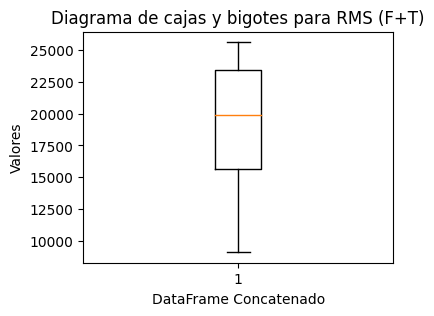

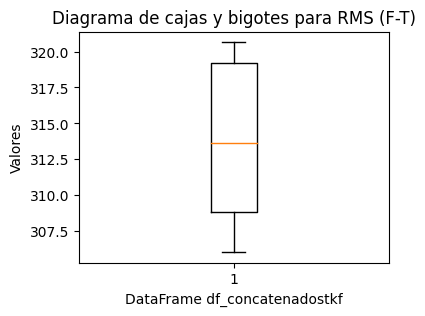

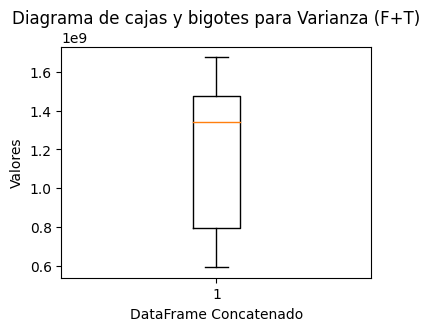

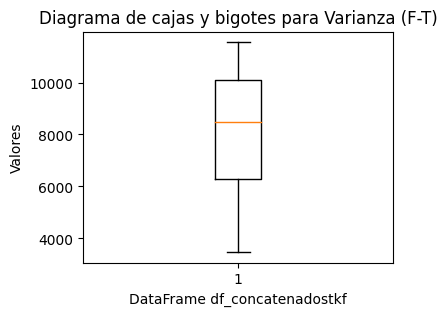

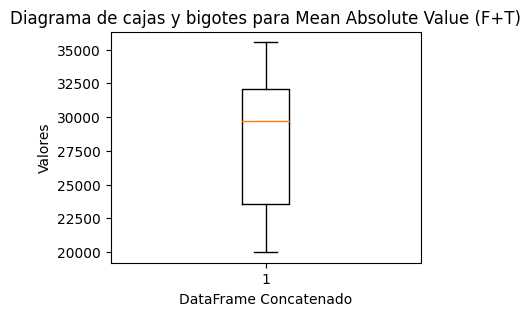

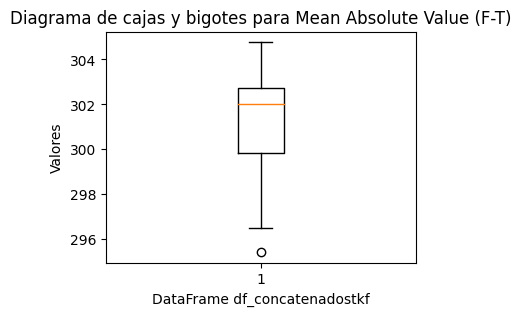

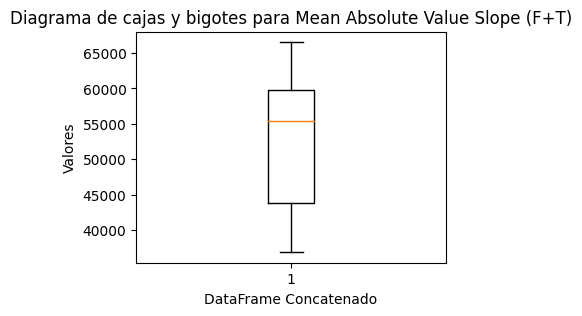

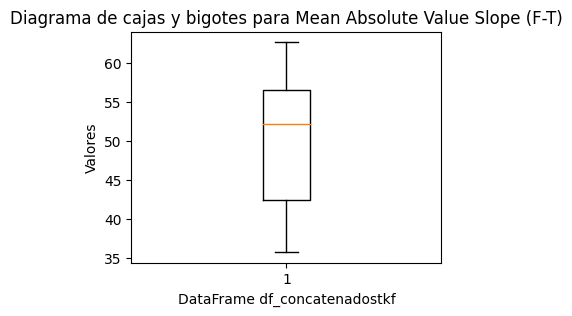

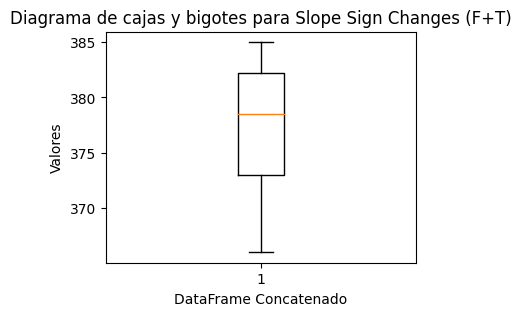

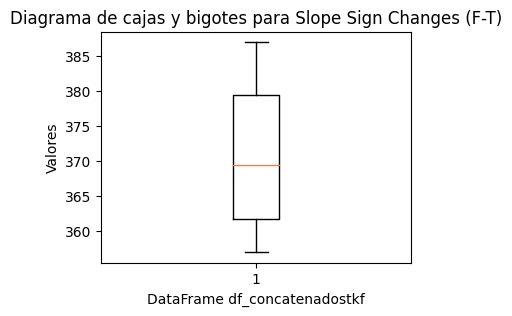

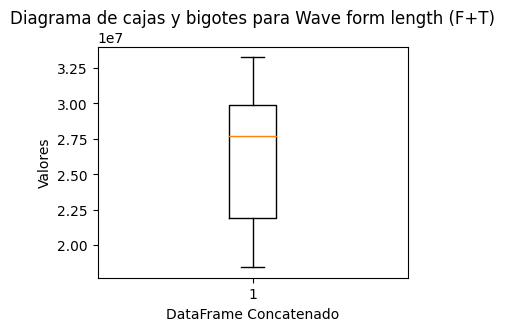

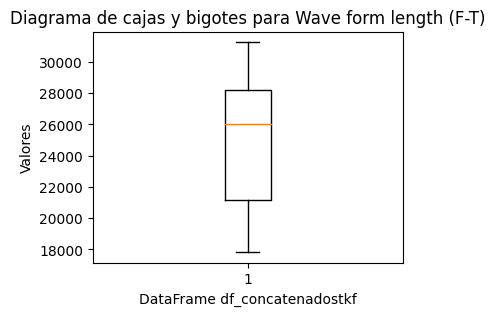

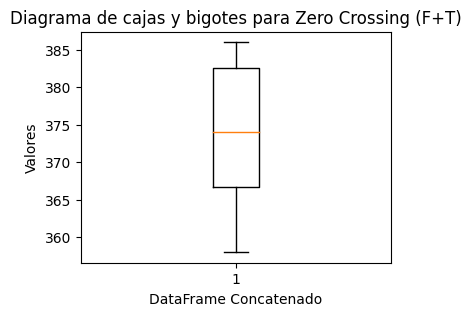

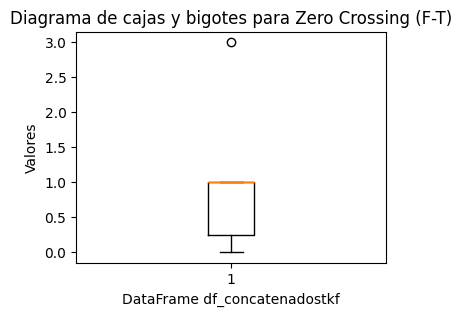

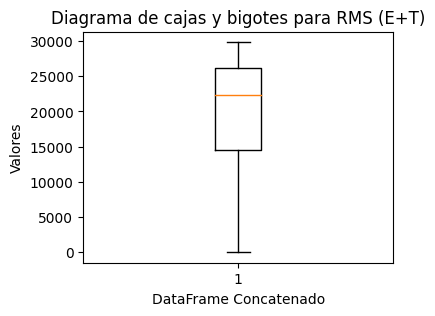

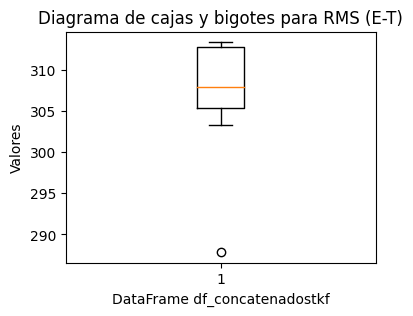

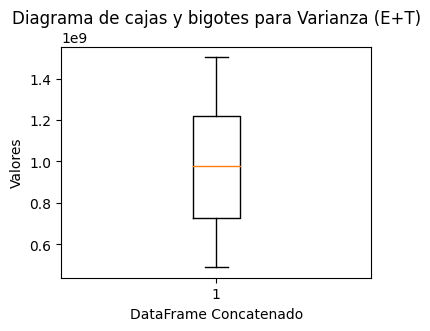

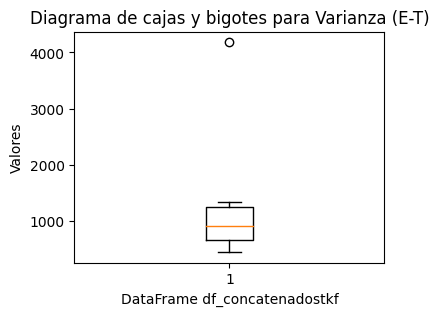

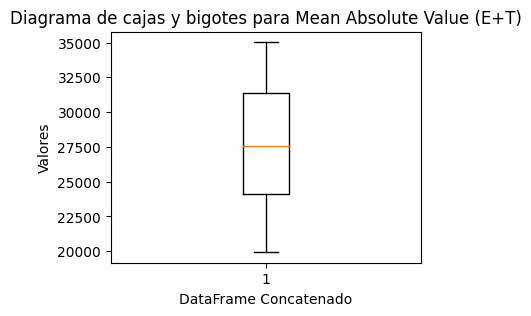

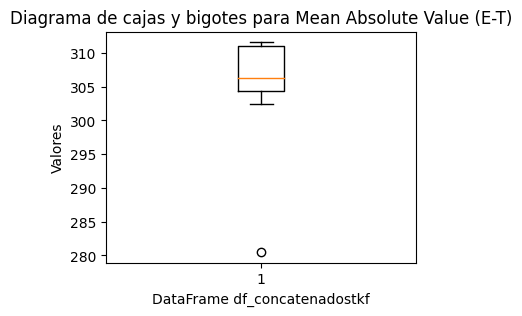

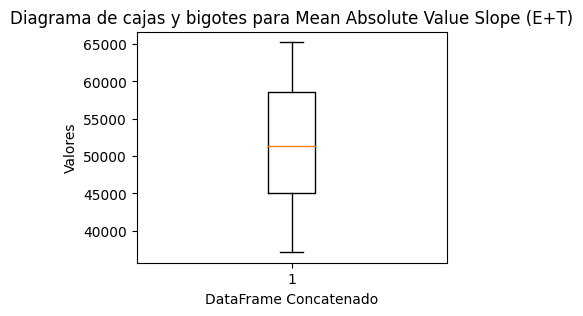

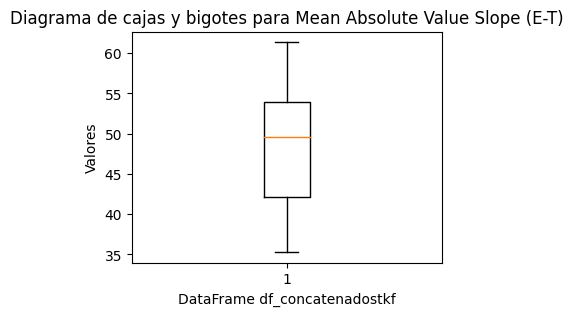

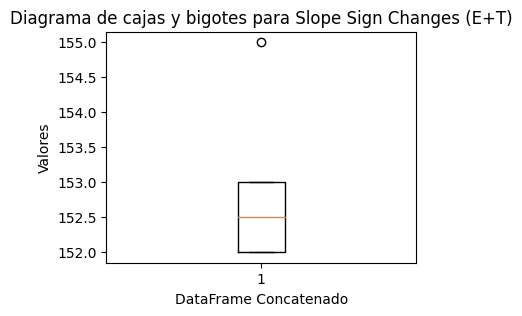

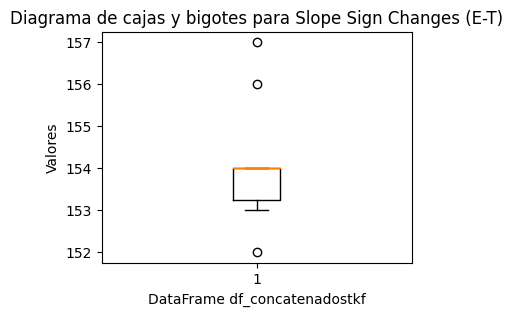

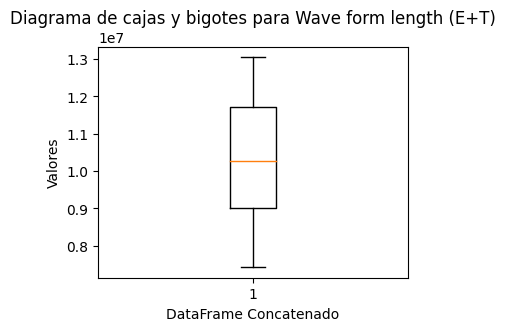

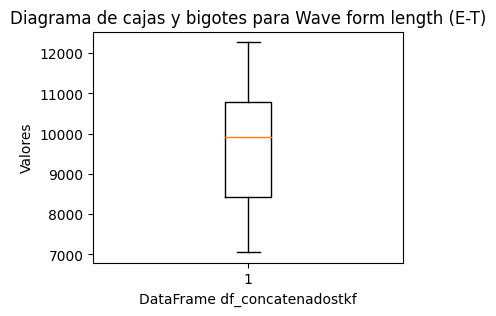

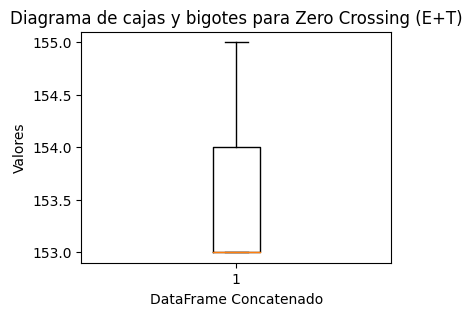

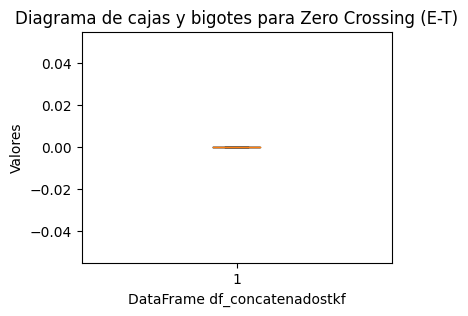

In [143]:
# Iterar sobre las columnas de los DataFrames y graficar un diagrama de cajas y bigotes para cada métrica
for col_concatenado, col_stkf in zip(df_concatenado.columns, df_concatenadostkf.columns):
    # Crear una nueva figura para cada métrica
    plt.figure(figsize=(4, 3))

    # Obtener los datos de las métricas de cada DataFrame
    datos_concatenado = df_concatenado[col_concatenado]
    datos_stkf = df_concatenadostkf[col_stkf]

    # Graficar un diagrama de cajas y bigotes para la métrica del DataFrame concatenado
    plt.boxplot(datos_concatenado)

    # Añadir título al gráfico
    plt.title(f'Diagrama de cajas y bigotes para {col_concatenado}')

    # Añadir etiquetas a los ejes
    plt.xlabel('DataFrame Concatenado')
    plt.ylabel('Valores')

    # Mostrar el gráfico
    plt.show()

    # Crear una nueva figura para la métrica del DataFrame df_concatenadostkf
    plt.figure(figsize=(4, 3))

    # Graficar un diagrama de cajas y bigotes para la métrica del DataFrame df_concatenadostkf
    plt.boxplot(datos_stkf)

    # Añadir título al gráfico
    plt.title(f'Diagrama de cajas y bigotes para {col_stkf}')

    # Añadir etiquetas a los ejes
    plt.xlabel('DataFrame df_concatenadostkf')
    plt.ylabel('Valores')

    # Mostrar el gráfico
    plt.show()


### Análisis
1. **RMS (Root Mean Square)**:
   - El RMS es una medida de la amplitud promedio de una señal. Al aplicar el operador TKEO a las señales de EMG, se resalta la información relevante para la contracción muscular, lo que resulta en una mayor amplitud en comparación con las señales originales de EMG. Esto se debe a que el TKEO puede realzar los cambios rápidos y significativos en la señal, que pueden corresponder a contracciones musculares más intensas.

2. **Varianza (Variance)**:
   - La varianza indica la dispersión de los datos alrededor de su media.Al aplicar el operador TKEO a las señales de EMG, es posible que se reduzca la varianza en comparación con las señales originales. Esto se debe a que el TKEO tiende a suavizar la señal al resaltar los cambios rápidos y significativos, lo que puede disminuir la dispersión de los datos alrededor de su media. es decir, al eliminar el ruido de alta frecuencia y realzar las características relevantes para la contracción muscular, el TKEO puede llevar a una reducción en la variabilidad de la señal, lo que se reflejaría en una menor varianza. Por lo tanto, al comparar las señales originales de EMG con las señales después de aplicar TKEO, podríamos observar una disminución en la varianza.

3. **Mean Absolute Value (Valor Absoluto Medio)**:
   - El Valor Absoluto Medio representa la magnitud promedio de una señal. Al aplicar TKEO, se resaltan las características relevantes para la contracción muscular, lo que puede aumentar el valor absoluto medio de la señal. Esto se debe a que el TKEO puede realzar los componentes de alta frecuencia asociados con la actividad muscular.

4. **Mean Absolute Value Slope (Pendiente del Valor Absoluto Medio)**:
   - La Pendiente del Valor Absoluto Medio indica la tasa de cambio de la magnitud promedio de una señal. Después de aplicar TKEO, es posible que se observen cambios más abruptos en la magnitud promedio de la señal, lo que resulta en una pendiente más pronunciada. Esto se debe a que el TKEO puede realzar los cambios rápidos en la señal asociados con la actividad muscular.

5. **Slope Sign Changes (Cambios de Signo de la Pendiente)**:
   - Este parámetro indica la cantidad de veces que la pendiente de la señal cambia de dirección. No se espera un cambio significativo en este aspecto al aplicar TKEO, ya que este operador no afecta directamente a la dirección de la pendiente de la señal, sino más bien a su magnitud.

6. **Waveform Length (Longitud de la Forma de Onda)**:
   - La longitud de la forma de onda representa la duración efectiva de la señal. Después de aplicar TKEO, es posible que la señal resultante tenga una duración efectiva mayor debido a la amplificación de componentes de alta frecuencia asociados con la actividad muscular. en este caso los resultados obtenidos discrepan con los esperados. podría deberse a cómo el operador afecta la longitud total de la señal. Por ejemplo, el TKEO podría resaltar ciertos componentes de la señal que contribuyen a una mayor longitud efectiva, como las características asociadas con las contracciones musculares relevantes para el análisis.
Por lo tanto, podríamos esperar diferencias en la longitud de onda entre las señales originales y las señales después de aplicar TKEO debido a cómo el operador afecta la forma y la estructura de la señal.

7. **Zero Crossing (Cruces por Cero)**:
   - Los cruces por cero indican la cantidad de veces que la señal cruza el eje horizontal. Después de aplicar TKEO, es posible que se observen más cruces por cero debido a la amplificación de componentes de alta frecuencia que pueden causar fluctuaciones más rápidas y frecuentes en la señal.


## Conclusiones

1. **Resaltado de características relevantes:** El TKEO resalta las características de interés en las señales, como los picos y los cambios rápidos, al tiempo que atenúa el ruido y las señales de baja energía. Esto facilita la identificación y el análisis de eventos importantes en las señales, como contracciones musculares o patrones de movimiento.

2. **Aumento de la amplitud aparente:** Debido a la amplificación de los picos y las partes de alta energía, la señal resultante después de aplicar el TKEO puede tener una amplitud aparente mayor en comparación con la señal original logrando la eliminacion (aparente) de la contaminacion generada por EKG . Esto puede hacer que las características importantes sean más visibles y fáciles de analizar.

4. **Uniformización de la señal:** El TKEO tiende a producir una señal más uniforme al eliminar las fluctuaciones de baja energía, lo que facilita la comparación y el análisis de diferentes partes de la señal.

### Conclusiones generales sobre las métricas EMG:

1. **RMS (Root Mean Square):** Un valor de RMS más alto indica una mayor actividad muscular.

2. **Varianza:** La varianza refleja la variabilidad de la actividad muscular en el tiempo.

3. **Mean Absolute Value (MAV):**  Cuando un músculo está más activo, produce una mayor cantidad de actividad eléctrica, lo que se refleja en valores más altos en la señal EMG. Por lo tanto, un valor de MAV más alto indica que la señal EMG tiene una mayor amplitud promedio, lo que sugiere una mayor actividad muscular durante el período de tiempo analizado.

4. **Mean Absolute Value Slope:** La pendiente del MAV indica la velocidad de cambio en la actividad muscular.

5. **Slope Sign Changes:** El número de cambios de signo en la señal EMG puede reflejar la variabilidad en la dirección de la actividad muscular.

6. **Waveform Length:** La longitud de la forma de onda de la señal EMG proporciona información sobre la duración y la forma de las contracciones musculares.

7. **Zero Crossing:** El número de cruces por cero en la señal EMG puede indicar cambios en la dirección o la polaridad de la actividad muscular.